In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

%matplotlib inline

In [2]:
df = pd.read_csv('data/new_preprocessed_data.csv')

In [3]:
df.head()

,Winner,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,...,B_Stance_OpenStance,B_Stance_Orthodox,B_Stance_Sideways,B_Stance_Southpaw,B_Stance_Switch,R_Stance_OpenStance,R_Stance_Orthodox,R_Stance_Sideways,R_Stance_Southpaw,R_Stance_Switch
0,Red,True,5,0.0,1.0,0.0,18.250000,11.416667,8.083333,5.250000,...,0,1,0,0,0,0,1,0,0,0
1,Red,False,3,0.0,1.0,0.0,5.000000,0.000000,9.000000,8.000000,...,0,1,0,0,0,0,1,0,0,0
2,Red,False,3,0.0,1.0,0.0,6.000000,2.625000,5.000000,2.125000,...,0,1,0,0,0,0,0,0,1,0
3,Blue,False,3,1.0,0.0,0.0,15.000000,7.000000,9.000000,7.000000,...,0,1,0,0,0,0,0,0,1,0
4,Blue,False,3,0.0,1.0,0.0,10.454545,7.363636,15.272727,11.636364,...,0,0,0,1,0,0,1,0,0,0


### Normalizing data

In [4]:
df_num = df.select_dtypes(include=[np.float, np.int])

In [5]:
scaler = StandardScaler()

df[list(df_num.columns)] = scaler.fit_transform(df[list(df_num.columns)])

### Splitting into train, test

In [4]:
y = df['Winner']
X = df.drop(columns = 'Winner')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=43)

### Fitting baseline Random Forest

In [5]:
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)

In [6]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=43, verbose=0, warm_start=False)

In [7]:
model.oob_score_

0.68287179487179483

In [8]:
y_preds = model.predict(X_test)

In [9]:
accuracy_score(y_test, y_preds)

0.7354085603112841

In [10]:
feat_imps = {}
for i, imp in enumerate(model.feature_importances_):
    feat_imps[X_train.columns[i]] = imp

In [11]:
sorted_imp_feats = (sorted(feat_imps.items(), key = lambda x: x[1], reverse=True))
sorted_imp_feats

[('R_age', 0.021375808867572239),
 ('B_age', 0.016982579437567622),
 ('B_Reach_cms', 0.015694252931681765),
 ('R_avg_opp_HEAD_landed', 0.014066353263128672),
 ('R_avg_opp_DISTANCE_landed', 0.013759015250146257),
 ('R_Reach_cms', 0.013490163235022294),
 ('R_Height_cms', 0.012936090572631594),
 ('R_avg_opp_SIG_STR_pct', 0.012796539477316597),
 ('B_Height_cms', 0.012641668625682617),
 ('R_avg_opp_SIG_STR_landed', 0.01257483051796858),
 ('B_avg_DISTANCE_att', 0.012079982194208914),
 ('R_avg_opp_HEAD_att', 0.011337009608781973),
 ('R_avg_TOTAL_STR_landed', 0.01081631466660433),
 ('R_avg_opp_DISTANCE_att', 0.010550358063070751),
 ('B_Weight_lbs', 0.010549137202530917),
 ('R_Weight_lbs', 0.010434911458753251),
 ('R_avg_opp_SIG_STR_att', 0.010157309239129733),
 ('R_avg_opp_TOTAL_STR_landed', 0.010073679104739159),
 ('R_avg_opp_TOTAL_STR_att', 0.01005844084888604),
 ('R_avg_opp_BODY_att', 0.010002444391115908),
 ('R_avg_BODY_att', 0.0099030174801280294),
 ('R_avg_SIG_STR_pct', 0.009876775831956

In [12]:
y_train.value_counts()

Red     3327
Blue    1548
Name: Winner, dtype: int64

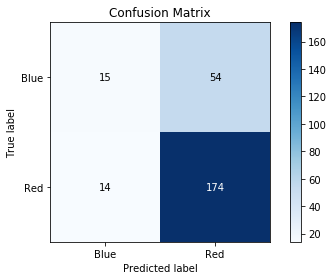

In [13]:
cm = confusion_matrix(y_test, y_preds)
classes = unique_labels(y_test, y_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')
# Loop over data dimensions and create text annotations.
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

### Oversampling

In [16]:
from imblearn.over_sampling import ADASYN

In [17]:
over_sampler = ADASYN()
X_resampled, y_resampled = over_sampler.fit_sample(X_train, y_train)

In [18]:
pd.Series(y_resampled).value_counts()

Red     3327
Blue    3111
dtype: int64

In [19]:
model2 = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=43)
model2.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=43, verbose=0, warm_start=False)

In [20]:
model2.oob_score_

0.7803665734700217

In [21]:
y2_preds = model2.predict(X_test)

In [22]:
accuracy_score(y_test, y2_preds)

0.68093385214007784

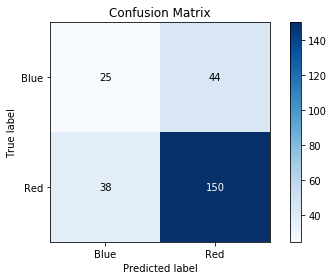

In [23]:
cm = confusion_matrix(y_test, y2_preds)
classes = unique_labels(y_test, y2_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [24]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

param_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
model3 = RandomForestClassifier(random_state=43)
rf_random = RandomizedSearchCV(estimator = model3, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_resampled, y_resampled)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=  51.0s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=  58.7s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstr

[CV] n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=80, bootstrap=False, total= 2.0min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.3min


[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False, total= 2.2min
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=90, bootstrap=False, total= 2.1min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total= 2.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimator

[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  16.5s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=90, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=True, total=  16.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=  14.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=False, total=  14.5s
[CV] n_estimators=20

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=70, bootstrap=False, total= 2.4min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=  15.0s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total=  34.7s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=  15.3s
[CV] n_estimators=600, min_

[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=50, bootstrap=True, total= 1.3min
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=  45.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=True, total=  44.8s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True, total=   6.7s
[CV] n_estimators=200, mi

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 37.8min


[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=True, total= 1.3min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=60, bootstrap=True, total=  25.8s
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True, total= 1.0min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=False, total= 2.3min
[CV] n_estimators=1800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=200

[CV] n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=True, total=  52.8s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.4min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=True, total= 1.6min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  26.4s
[CV] n_estimators=1200, 

[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=False, total= 1.5min
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   9.4s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False, total= 1.2min
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=None, bootstrap=True, total=   9.4s
[CV] n_estimators=2

In [ ]:
rf_random.best_params_

In [ ]:
model4 = rf_random.best_estimator_

In [ ]:
y3_preds = model4.predict(X_test)
accuracy_score(y_test, y3_preds)

In [ ]:
new_param_grid = {'bootstrap': [True, False],
 'max_depth': [50, 60, 70],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 3, 4],
 'n_estimators': [600, 800, 1000, 1200],
'criterion' :['gini']}

In [ ]:
rf = RandomForestClassifier(random_state=43)
rf_grid = GridSearchCV(estimator = rf, param_grid = new_param_grid, 
                                cv = 3, verbose=2, n_jobs = -1)
rf_grid.fit(X_resampled, y_resampled)

In [ ]:
rf_grid.best_params_

In [ ]:
model5 = rf_grid.best_estimator_

In [ ]:
y4_preds = model5.predict(X_test)
accuracy_score(y_test, y4_preds)

In [ ]:
cm = confusion_matrix(y_test, y4_preds)
classes = unique_labels(y_test, y4_preds)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
ax

In [ ]:
print(classification_report(y_test, y_preds))

In [ ]:
print(classification_report(y_test, y2_preds))

In [ ]:
print(classification_report(y_test, y3_preds))

In [ ]:
print(classification_report(y_test, y4_preds))